In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import cm, scale, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump, widget_g_plot
import combine.grid_analyze_version2 as ga

In [2]:
consts = {
        # in -> outside cell numbers (sum is redial resolution)
        "NirC": 10, "NirS": 20, "NirN": 20,
        # half(-1/2) poloidal and toroidal cell number
        "Niphalf": 200, "Nit": 37,
        # poloidal grid spacing and smoothing options implemented by phg
        "eq_space": True, "eq_space_vessel": True, "zoidpol": False, "eq_space_vessel_offset": (.1, 0.1),
        # strating angle in [0,Nit[ and offset list of projection center
        "trace_angle": 26, "center_delta_R": [0,0,0,0.05,.1], "center_delta_Z": [0,0,0,0,0],
        # path to magnetic field file
        "magnetic_field_file": "./Fields/Field-FTM-high.dat",
        "configuration": "FTM" # overwrites more specific changes
    }

In [3]:
size = consts["Niphalf"]*2+1, consts["Nit"]
scales_mus_covs = [
    # strength, pol, tor
    [ 0.2 , [ 0.3 , 0.7 ], [[30,0],[0, 7]]], [ 0.1 , [ 1   , 0.7 ], [[20,0],[0,20]]],
    [-0.1 , [ 0.43, 0.92], [[10,0],[0, 5]]], [-0.05, [ 0.95, 1   ], [[20,0],[0, 5]]],
    [ 0.3 , [ 0.61, 1   ], [[10,0],[0, 5]]], [-0.3 , [ 0.9 , 0.87], [[15,0],[0,10]]],
    [-0.25, [ 0.41, 0.85], [[10,0],[0, 5]]], [ 0.4 , [ 0.2 , 0.65], [[30,0],[0, 5]]],
    [ 0.4 , [ 0.2 , 0.55], [[20,0],[0, 8]]], [-0.4 , [ 0.45, 0.55], [[10,0],[0, 8]]],  
    [-0.45, [ 0.4 , 0.62], [[10,0],[0, 8]]], [ 0.45, [ 0.6 , 0.62], [[10,0],[0, 8]]],
    [ 0.85, [ 0.3 , 0.4 ], [[10,0],[0, 8]]], [-0.85, [ 0.38, 0.4 ], [[10,0],[0, 8]]],  
    [ 0.15, [ 0.95, 0.45], [[ 5,0],[0, 8]]], [ 0.5 , [ 0.32, 0.33], [[ 8,0],[0, 8]]], 
    [-0.3 , [ 0.37 ,0.33], [[ 8,0],[0, 8]]], [ 0.35, [ 0.95, 0.33], [[ 4,0],[0,10]]],
    [ 0.6 , [ 0.95, 0.20], [[ 4,0],[0, 8]]], [ 0.9 , [ 0.23, 0.27], [[ 8,0],[0,10]]], 
    [-0.8 , [ 0.34, 0.27], [[15,0],[0,10]]], [-0.6 , [ 0.34, 0.13], [[10,0],[0,10]]],
    [ 0.7 , [ 0.25, 0.27], [[ 5,0],[0,10]]], [ 0.3 , [ 0.5 , 0.27], [[15,0],[0,10]]],
    [ 0.4 , [ 0.22, 0.23], [[ 8,0],[0,10]]], [-0.3 , [ 0.13, 0.3 ], [[10,0],[0, 5]]],
    [-0.4 , [ 0.13, 0.25], [[10,0],[0, 5]]], [-0.1 , [ 0.73, 0.22], [[30,0],[0,15]]],
    [ 0.7 , [ 0.0 , 0.25], [[10,0],[0,10]]], [ 1.0 , [ 0.3 , 0.15], [[ 8,0],[0, 5]]],
    [ 0.7 , [ 0.98, 0.15], [[ 8,0],[0, 5]]], [ 0.7 , [ 0.24, 0.22], [[ 5,0],[0, 8]]],
    [-0.7 , [ 0.34, 0.27], [[ 5,0],[0, 5]]], [ 0.5 , [ 0.42, 0.27], [[ 5,0],[0, 5]]],
    [ 0.5 , [ 0.5 , 0.27], [[ 5,0],[0, 5]]], [ 0.6 , [ 0.72, 0.27], [[ 5,0],[0, 5]]],
    [ 0.7 , [ 0.98, 0.27], [[ 5,0],[0, 5]]], [-0.5 , [ 0.5 , 0.27], [[ 5,0],[0, 5]]], 
    [ 0.9 , [ 0.28, 0.27], [[ 4,0],[0, 4]]], [-0.7 , [ 0.34, 0.13], [[ 5,0],[0, 5]]],
    [ 0.9 , [ 0.42, 0.13], [[ 5,0],[0, 5]]], [ 0.6 , [ 0.72, 0.13], [[ 5,0],[0, 5]]],
    [ 0.7 , [ 0.98, 0.13], [[ 5,0],[0, 5]]], [-0.5 , [ 0.45, 0.13], [[ 5,0],[0, 5]]],
    [ 1.0 , [ 0.28, 0.13], [[ 4,0],[0, 4]]], [-0.3 , [ 0.0 , 0.0 ], [[ 4,0],[0, 8]]],
    [-0.3 , [ 0.1 , 0.0 ], [[ 4,0],[0, 8]]], [-0.5 , [ 0.16, 0.0 ], [[ 5,0],[0, 8]]],
    [ 1.9 , [ 0.31, 0.0 ], [[ 8,0],[0, 8]]], [ 1.6 , [ 1.0 , 0.0 ], [[ 3,0],[0, 8]]],
    [-0.7 , [ 0.42, 0.0 ], [[15,0],[0, 8]]], [-0.6 , [ 0.39, 0.0 ], [[ 5,0],[0, 8]]],
    [-0.5 , [ 0.85, 0.0 ], [[ 4,0],[0, 8]]], [ 0.3 , [ 0.3 , 0.05], [[ 4,0],[0, 4]]],
    [ 0.3 , [ 0.28, 0.05], [[ 4,0],[0, 4]]], [-0.3 , [ 0.22, 0.05], [[ 4,0],[0, 4]]],
    [ 0.3 , [ 0.26, 0.0 ], [[ 4,0],[0, 4]]], [-0.3 , [ 0.4 , 0.0 ], [[ 4,0],[0, 4]]],
    [ 0.3 , [ 0.45, 0.0 ], [[ 4,0],[0, 4]]],
]
consts["vessel_pdf"] = multi_bump(size, scales_mus_covs)

In [4]:
g = gen_grid(consts, load=None,
         save="/u/phg/grid/tracer/W7X/Grids/FTM-corrected-big",
         all_grids_folder=None, pp=True)

Define grid parameters & locations
Trace mag. axis
load/calculate mag. field
construct flux surfaces in confinement region
0 [5.39502396 0.2303183  0.44152113]
1 [5.5893152  0.24337115 0.44152113]
9 [5.74196192 0.23737907 0.44152113]
29 [5.8063108  0.23089961 0.44152113]
extrapoloate intermediate surfaces linearily
extend field surfaces along fieldline.
r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, r = 10, r = 11, r = 12, r = 13, r = 14, r = 15, r = 16, r = 17, r = 18, r = 19, r = 20, r = 21, r = 22, r = 23, r = 24, r = 25, r = 26, r = 27, r = 28, r = 29, File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
make fractional Vessel spacing
Check grid
grid has 0 errors
Use vessel exterior for grid boundary
/raven/u/phg/grid/tracer/W7X/structures/vacuumvessel/vessel.medium
File: vessel.medium
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.

<IPython.core.display.Javascript object>


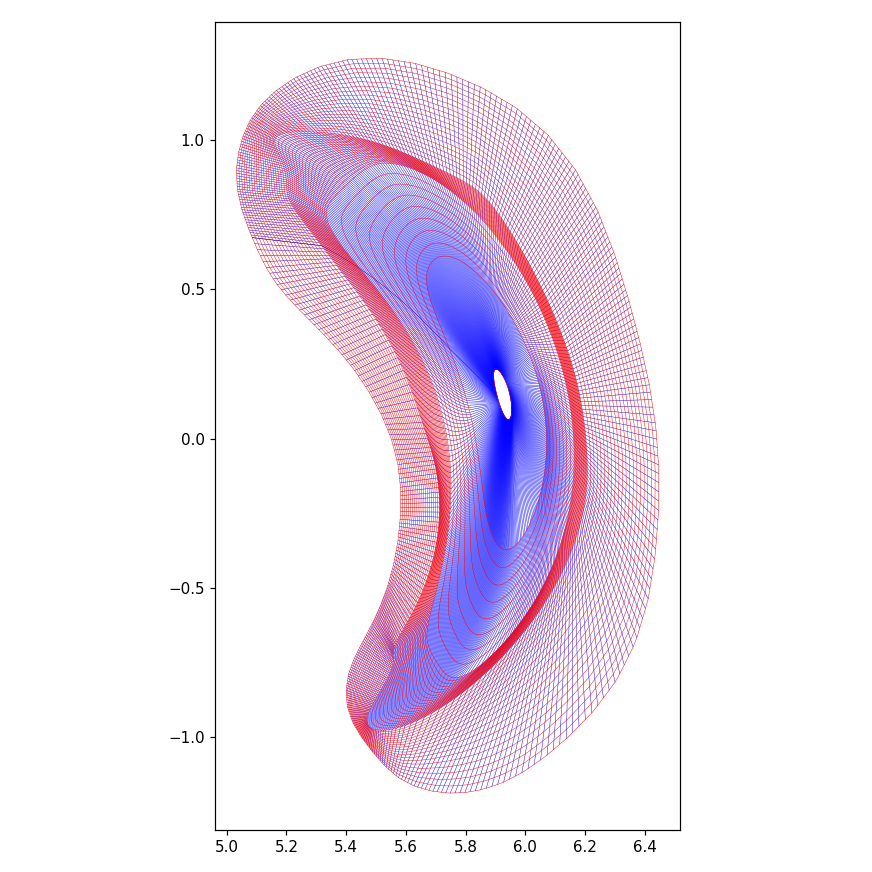

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [5]:
g2 = np.load("/u/phg/grid/tracer/W7X/Grids/FTM-corrected-big.npz")["data"]
widget_g_plot(g, phi=0)

In [6]:
# check if convex (r, tht, phi)
ret = np.nonzero(ga.nonconvex(g) != 1)
_ = np.array([*ret]).T

In [7]:
_

array([], shape=(0, 3), dtype=int64)